In [37]:
import pandas as pd
import numpy as np

In [38]:
#Loading data for analysis
punjabData = pd.read_csv('PreProcessedPunjabData.csv')
namalData = pd.read_csv('Namal.csv')
imageData = pd.read_csv('Image.csv')
sensorData = pd.read_csv('Sensor.csv')
print(len(namalData))

1572


In [39]:
#Namal data have inner and outer values, so taking mean 
namalData = namalData.groupby('Sample ID', as_index=False).mean()
print(len(namalData))

612


In [40]:
list(imageData)
list(namalData)

['Sample ID', 'PH (1:1)', 'ECe (1:1)(mS/cm)', 'OM %', 'P (ppm)']

In [41]:
sampleID = imageData['sampleID']
print(sampleID)

0     110639
1     110645
2     110660
3     110661
4     110662
       ...  
95    124239
96    124240
97    124241
98    124243
99    124244
Name: sampleID, Length: 100, dtype: int64


In [44]:
#Getting IDs which are available both in namal dataset and image dataset
counter = 0
IDs = []
for sample in sampleID:
    check = namalData[namalData['Sample ID'] == sample]
    if len(check) == 1:
        IDs.append(sample)
        counter += 1
    else:
        continue
print(len(IDs))

91


In [46]:
list(punjabData)

['Unnamed: 0', 'sampleID', 'EC', 'pH', 'P']

In [87]:
sensorData[sensorData['sampleID']==110639].iloc[0][2]

7.733333333333333

In [107]:
#Getting P, EC and pH values from namal, image, punjab and sensor
punjabP = []
punjabEC = []
punjabpH = []
namalP = []
namalEC = []
namalpH = []
sensorP = []
sensorEC = []
sensorpH = []
imageP = []
imageEC = []
imagepH = []
for sample in sampleID:
    if len(punjabData[punjabData['sampleID'] == sample]) == 1 and len(namalData[namalData['Sample ID']==sample]) == 1 and len(sensorData[sensorData['sampleID']==sample]) == 1 and len(imageData[imageData['sampleID']==sample]) == 1:
        #Phosphorous values for each dataset
        punjabP.append(punjabData[punjabData['sampleID'] == sample].iloc[0][4])
        namalP.append(namalData[namalData['Sample ID']== sample].iloc[0][4])
        imageP.append(imageData[imageData['sampleID']== sample].iloc[0][2])
        sensorP.append(sensorData[sensorData['sampleID']== sample].iloc[0][3])
        #EC values for each dataset
        punjabEC.append(punjabData[punjabData['sampleID'] == sample].iloc[0][2])
        namalEC.append(namalData[namalData['Sample ID']== sample].iloc[0][2])
        imageEC.append(imageData[imageData['sampleID']== sample].iloc[0][4])
        sensorEC.append(sensorData[sensorData['sampleID']== sample].iloc[0][4])
        #pH values for each dataset
        punjabpH.append(punjabData[punjabData['sampleID'] == sample].iloc[0][3])
        namalpH.append(namalData[namalData['Sample ID']== sample].iloc[0][1])
        imagepH.append(imageData[imageData['sampleID']== sample].iloc[0][3])
        sensorpH.append(sensorData[sensorData['sampleID']== sample].iloc[0][2])
                                                                    
    else:
        continue


In [108]:
print(len(imageP), len(imagepH), len(imageEC))

91 91 91


In [109]:
print(len(namalP), len(namalpH), len(namalEC))

91 91 91


In [110]:
print(len(sensorP), len(sensorpH), len(sensorEC))

91 91 91


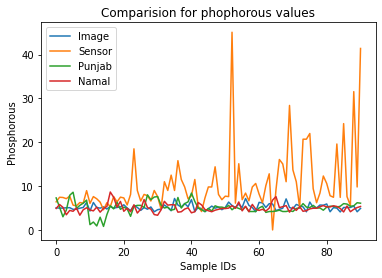

In [112]:
import matplotlib.pyplot as plt

IDs = np.arange(0, 91, 1)

# plotting the image data
plt.plot(IDs,imageP, label = "Image")

# plotting the sensor data
plt.plot(IDs, sensorP, label = "Sensor")

# plotting the Punjab
plt.plot(IDs, punjabP, label = "Punjab")

# plotting the namal data
plt.plot(IDs, namalP, label = "Namal")

plt.xlabel('Sample IDs')


# Set the y axis label of the current axis.
plt.ylabel('Phosphorous')


plt.title('Comparison for phophorous values')
# show a legend on the plot
plt.legend()

#saving fig
plt.savefig("PhosphorousComparison.jpg")
# Display a figure.
plt.show()

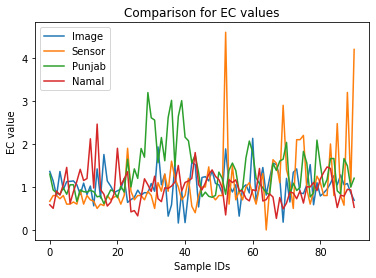

In [113]:

IDs = np.arange(0, 91, 1)

# plotting the image data
plt.plot(IDs,imageEC, label = "Image")

# plotting the sensor data
plt.plot(IDs, sensorEC, label = "Sensor")

# plotting the Punjab
plt.plot(IDs, punjabEC, label = "Punjab")

# plotting the namal data
plt.plot(IDs, namalEC, label = "Namal")

plt.xlabel('Sample IDs')


# Set the y axis label of the current axis.
plt.ylabel('EC value')


plt.title('Comparison for EC values')
# show a legend on the plot
plt.legend()

#saving fig
plt.savefig("EcComparison.jpg")
# Display a figure.
plt.show()

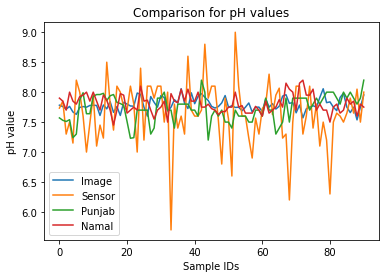

In [114]:

IDs = np.arange(0, 91, 1)

# plotting the image data
plt.plot(IDs,imagepH, label = "Image")

# plotting the sensor data
plt.plot(IDs, sensorpH, label = "Sensor")

# plotting the Punjab
plt.plot(IDs, punjabpH, label = "Punjab")

# plotting the namal data
plt.plot(IDs, namalpH, label = "Namal")

plt.xlabel('Sample IDs')


# Set the y axis label of the current axis.
plt.ylabel('pH value')


plt.title('Comparison for pH values')
# show a legend on the plot
plt.legend()

#saving fig
plt.savefig("pHComparison.jpg")
# Display a figure.
plt.show()